In [1]:
import tensorflow as     tf
from   tensorflow import keras

In [2]:
# TODO Split the GPU up into multiple GPUs?

In [3]:
# TODO Use the dataset's pre-fetch method?

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/wsladmin/.local/lib/python3.8/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [5]:
validation_set_size     = 5000
maximum_pixel_intensity = 255.0

In [6]:
X_valid, X_train = X_train_full[:validation_set_size] / maximum_pixel_intensity, X_train_full[validation_set_size:] / maximum_pixel_intensity
y_valid, y_train = y_train_full[:validation_set_size], y_train_full[validation_set_size:]
X_test           = X_test / maximum_pixel_intensity

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

### `keras` Callbacks

#### `Checkpoint` Callback

In [10]:
# TODO Prepend the uploads directory and the broader path to this filename.

outfile_pathname  = 'uploads/trainedModels/trained_model.h5' 
checkpoint_cb     = keras.callbacks.ModelCheckpoint(outfile_pathname, save_best_only=True)

#### `EarlyStopping` Callback

In [11]:
# TODO Make `patience` dynamic, according to the user-response to the question "How will it automatically stop training?" in the Electron app.

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)

In [12]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7393 - accuracy: 0.7586 - val_loss: 0.5287 - val_accuracy: 0.8240
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4964 - accuracy: 0.8270 - val_loss: 0.4845 - val_accuracy: 0.8252
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4518 - accuracy: 0.8425 - val_loss: 0.4247 - val_accuracy: 0.8554
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4222 - accuracy: 0.8513 - val_loss: 0.4078 - val_accuracy: 0.8624
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4001 - accuracy: 0.8595 - val_loss: 0.3897 - val_accuracy: 0.8706
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3840 - accuracy: 0.8641 - val_loss: 0.3929 - val_accuracy: 0.8646
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3691 - accuracy: 0.8691 - val_loss: 0.3631 - val_ac

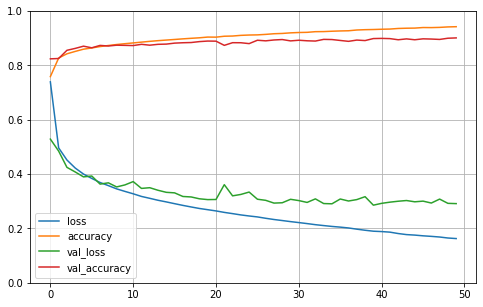

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
#plt.show() #ffg4ffca8vwc222waddr3wdfvddddwaddfdd12fed12fef12d